<a href="https://colab.research.google.com/github/Gcango/Projecto_7/blob/main/Movimento_migratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesta análise, foram examinados dados de imigração, com um foco específico na África e em Angola, para o Canadá no período de 1980 a 2013. Os dados fornecidos pelo professor Ruhid despertaram nossa atenção, levando-nos a compreender o panorama migratório do continente africano nesse período e a destacar o papel significativo que Angola desempenhou em termos de imigração para o Canadá.
A análise desses dados revelou insights valiosos sobre os padrões de migração ao longo de três décadas. Ao examinar as tendências migratórias da África como um todo, pudemos identificar os principais fluxos de imigração para o Canadá. Além disso, ao analisar especificamente os dados de imigração de Angola, pudemos observar um crescimento significativo ao longo do tempo, destacando o interesse e a atratividade do Canadá como destino para os angolanos. Em suma, essa análise abrangente dos dados de imigração nos proporcionou uma visão mais profunda e contextualizada do fenômeno migratório da África para o Canadá, destacando o papel crucial de Angola nesse cenário. Essas descobertas são essenciais para informar políticas e estratégias futuras relacionadas à imigração e integração de diferentes comunidades no Canadá.


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
dados = pd.read_excel("/content/Canada_1.xlsx", sheet_name='my_sheet')

In [81]:
dados.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [82]:
dados.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [83]:
dados[['AreaName']]

,AreaName
0,Asia
1,Europe
2,Africa
3,Oceania
4,Europe
...,...
191,Africa
192,Asia
193,Africa
194,Africa


In [84]:
list(dados.columns[9:])

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [85]:
dados2 = dados[['AreaName'] + list(dados.columns[9:])]

In [86]:
dados2

,AreaName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Asia,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Europe,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Africa,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Oceania,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Europe,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Africa,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Asia,1,2,1,6,0,18,7,12,7,...,124,161,140,122,133,128,211,160,174,217
193,Africa,11,17,11,7,16,9,15,23,44,...,56,91,77,71,64,60,102,69,46,59
194,Africa,72,114,102,44,32,29,43,68,99,...,1450,615,454,663,611,508,494,434,437,407


In [87]:
dados2.set_index('AreaName', inplace = True)
dados2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AreaName,,,,,,,,,,,,,,,,,,,,,
Asia,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Europe,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Africa,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
Oceania,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Europe,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Asia,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217
Africa,11,17,11,7,16,9,15,23,44,68,...,56,91,77,71,64,60,102,69,46,59


In [88]:
print("O datase possui", dados2.shape[0], "e",dados2.shape[1], "Colunas" )

O datase possui 196 e 34 Colunas


In [89]:
#Calcular o Total da População para cada continente

In [90]:
dados2['Total'] = dados2.sum(axis = 1)

<ipython-input-90-e84bf0f00663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados2['Total'] = dados2.sum(axis = 1)


In [91]:
dados2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
AreaName,,,,,,,,,,,,,,,,,,,,,
Asia,16,39,39,47,71,340,496,741,828,1076,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Europe,1,0,0,0,0,0,1,2,2,3,...,1223,856,702,560,716,561,539,620,603,15699
Africa,80,67,71,69,63,44,69,132,242,434,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Oceania,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,6
Europe,0,0,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Africa,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Asia,1,2,1,6,0,18,7,12,7,18,...,161,140,122,133,128,211,160,174,217,2985
Africa,11,17,11,7,16,9,15,23,44,68,...,91,77,71,64,60,102,69,46,59,1677


In [92]:
dados2 = dados2.groupby(('AreaName'), axis = 0).sum()

In [93]:
dados2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
AreaName,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


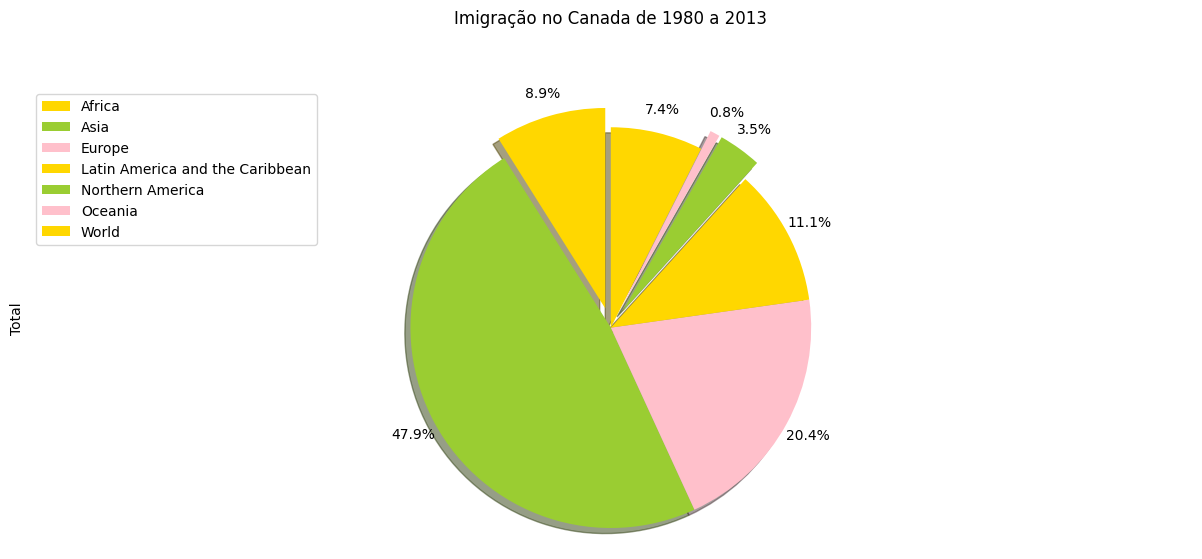

In [94]:
color_list = ['gold', 'yellowgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1, 0]
dados2['Total'].plot(kind = 'pie',

                     figsize = (15,6),
                     autopct = '%1.1f%%',
                     shadow = True,
                     startangle = 90,
                     labels = None,
                     pctdistance = 1.12,
                     colors = color_list,
                     explode = explode_list
                      )

plt.title('Imigração no Canada de 1980 a 2013', y = 1.12)
plt.axis('equal')
plt.legend(labels = dados2.index, loc = 'upper left')
plt.show()

In [95]:
dados2.columns

Index([   1980,    1981,    1982,    1983,    1984,    1985,    1986,    1987,
          1988,    1989,    1990,    1991,    1992,    1993,    1994,    1995,
          1996,    1997,    1998,    1999,    2000,    2001,    2002,    2003,
          2004,    2005,    2006,    2007,    2008,    2009,    2010,    2011,
          2012,    2013, 'Total'],
      dtype='object')

In [96]:
dados_africa = dados2.loc['Africa']

In [97]:
dados_africa.describe()

count        35.000000
mean      35368.457143
std      102194.925072
min        2639.000000
25%        8723.000000
50%       15996.000000
75%       28238.000000
max      618948.000000
Name: Africa, dtype: float64

In [98]:
dados_africa

1980       3951
1981       4363
1982       3819
1983       2671
1984       2639
1985       2650
1986       3782
1987       7494
1988       7552
1989       9894
1990      11012
1991      14228
1992      19242
1993      16531
1994      13072
1995      14806
1996      15700
1997      14471
1998      13791
1999      15996
2000      20346
2001      24292
2002      22710
2003      23366
2004      28192
2005      27523
2006      29188
2007      28284
2008      29890
2009      34534
2010      40892
2011      35441
2012      38083
2013      38543
Total    618948
Name: Africa, dtype: int64

In [99]:
africa = {
    'Ano': list(range(1980, 2014)),
    'Valores': [
        3951, 4363, 3819, 2671, 2639, 2650, 3782, 7494, 7552, 9894,
        11012, 14228, 19242, 16531, 13072, 14806, 15700, 14471, 13791,
        15996, 20346, 24292, 22710, 23366, 28192, 27523, 29188, 28284,
        29890, 34534, 40892, 35441, 38083, 38543
    ]
}

df = pd.DataFrame(africa)

In [100]:
df

,Ano,Valores
0,1980,3951
1,1981,4363
2,1982,3819
3,1983,2671
4,1984,2639
5,1985,2650
6,1986,3782
7,1987,7494
8,1988,7552
9,1989,9894


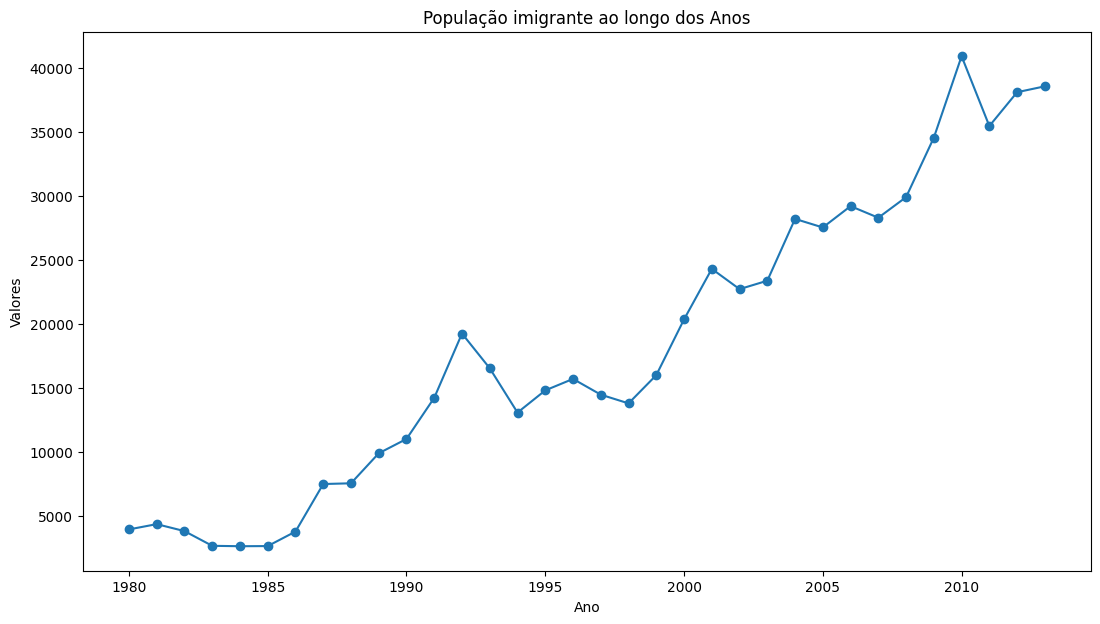

In [101]:
plt.figure(figsize=(13, 7))
plt.plot(df['Ano'], df['Valores'], marker='o', linestyle='-')
plt.title('População imigrante ao longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.show()

In [102]:
media = df['Valores'].mean()
maximo = df['Valores'].max()
minimo = df['Valores'].min()
desvio = df['Valores'].std()
total = dados_africa.iloc[-1]

In [103]:
print("A média de Imigrantes Africanos de 1980 a 2013 foi de: ", round(media, 2), 'imigrantes')
print("A imigração no periodo de 1980 a 2013 atingiu o seu valor máximo em 2010 com: ", maximo, "imigrantes")
print("A imigração no periodo de 1980 a 2013 atingiu o seu valor minimo em 1984 com: ", minimo, "imigrantes")
print("O desvio padrão deste intervalo de imigração foi de:", round(desvio, 2))
print("O total de imigrante neste periodo foi de:", total)

A média de Imigrantes Africanos de 1980 a 2013 foi de:  18204.35 imigrantes
A imigração no periodo de 1980 a 2013 atingiu o seu valor máximo em 2010 com:  40892 imigrantes
A imigração no periodo de 1980 a 2013 atingiu o seu valor minimo em 1984 com:  2639 imigrantes
O desvio padrão deste intervalo de imigração foi de: 11687.33
O total de imigrante neste periodo foi de: 618948


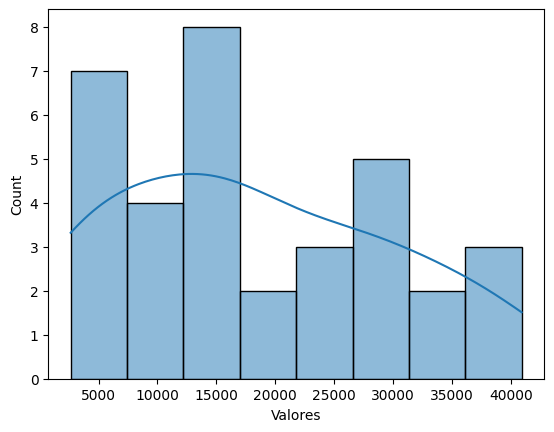

In [104]:
sns.histplot(data=df, x='Valores', bins=8, kde=True);

In [105]:
data_final = df.copy()

In [106]:
data_final['Porcentagem%'] = (data_final['Valores'] / total) * 100
data_final['Porcentagem%'] = round(data_final['Porcentagem%'], 2)
data_final

,Ano,Valores,Porcentagem%
0,1980,3951,0.64
1,1981,4363,0.70
2,1982,3819,0.62
3,1983,2671,0.43
4,1984,2639,0.43
5,1985,2650,0.43
6,1986,3782,0.61
7,1987,7494,1.21
8,1988,7552,1.22
9,1989,9894,1.60


In [107]:
dados.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [108]:
dados[['OdName']]

,OdName
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
191,Western Sahara
192,Yemen
193,Zambia
194,Zimbabwe


In [109]:
list(dados.columns[9:])

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [110]:
dados_angola = dados[['OdName'] + list(dados.columns[9:])]

In [111]:
dados_angola

,OdName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,80,67,71,69,63,44,69,132,242,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18,7,12,7,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,11,17,11,7,16,9,15,23,44,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,72,114,102,44,32,29,43,68,99,...,1450,615,454,663,611,508,494,434,437,407


In [112]:
df_angola = dados_angola.iloc[5]

In [113]:
df_angola[::1]

OdName    Angola
1980           1
1981           3
1982           6
1983           6
1984           4
1985           3
1986           5
1987           5
1988          11
1989           6
1990           8
1991          23
1992          26
1993          22
1994           8
1995          26
1996          38
1997          27
1998          58
1999          49
2000          70
2001         169
2002         168
2003         165
2004         268
2005         295
2006         184
2007         106
2008          76
2009          62
2010          61
2011          39
2012          70
2013          45
Name: 5, dtype: object

In [120]:
Angola = [1, 3, 6, 6, 4, 3, 5, 5, 11, 6, 8, 23, 26, 22, 8, 26, 38, 27, 58, 49, 70, 169,
     168, 165, 268, 295, 184, 106, 76, 62, 61, 39, 70, 45]

In [121]:
data_final['Angola'] = Angola

In [122]:
data_final = data_final[['Ano','Valores','Porcentagem%','Angola']]

In [125]:
data_final

,Ano,Valores,Porcentagem%,Angola
0,1980,3951,0.64,1
1,1981,4363,0.70,3
2,1982,3819,0.62,6
3,1983,2671,0.43,6
4,1984,2639,0.43,4
5,1985,2650,0.43,3
6,1986,3782,0.61,5
7,1987,7494,1.21,5
8,1988,7552,1.22,11
9,1989,9894,1.60,6


In [133]:
angola_data = data_final['Angola'].describe()

In [144]:
print("DADOS IMPORTANTES SOBRE A IMIGRAÇÃO DE ANGOLA PARA CANADA DE 1980 A 2013")
print("O total de imigrante no perido de 1980 a 2013 referentes Angola para Canada foi de:", data_final['Angola'].sum(),'imigrantes')
print("A média de imigração foi de Angola para Canada foi de:", round(angola_data.iloc[1], 2), 'imigrantes')
print("O numero máximo de imigrantes atingiu de:",angola_data.iloc[7],"no ano de 2005")
print("O numero minimo de imigrantes foi de:",angola_data.iloc[3],"em 1980")
print("O De acordo com os dados dispensados, o desvio padrão da imigração foi de:",round(angola_data.iloc[2], 2))



DADOS IMPORTANTES SOBRE A IMIGRAÇÃO DE ANGOLA PARA CANADA DE 1980 A 2013
O total de imigrante no perido de 1980 a 2013 referentes Angola para Canada foi de: 2113 imigrantes
A média de imigração foi de Angola para Canada foi de: 62.15 imigrantes
O numero máximo de imigrantes atingiu de: 295.0 no ano de 2005
O numero minimo de imigrantes foi de: 1.0 em 1980
O De acordo com os dados dispensados, o desvio padrão da imigração foi de: 76.69


In [159]:
total
angola_total = data_final['Angola'].sum()
dif = total - angola_total
porc_angola = angola_total * 100 / total

In [160]:
print("O total da imigração para Africa foi de", total)
print("A diferença entre dete total é de",dif)
print("A influência de Angola sobre total foi de", round(porc_angola, 2),"%")

O total da imigração para Africa foi de 618948
A diferença entre dete total é de 616835
A influência de Angola sobre total foi de 0.34 %


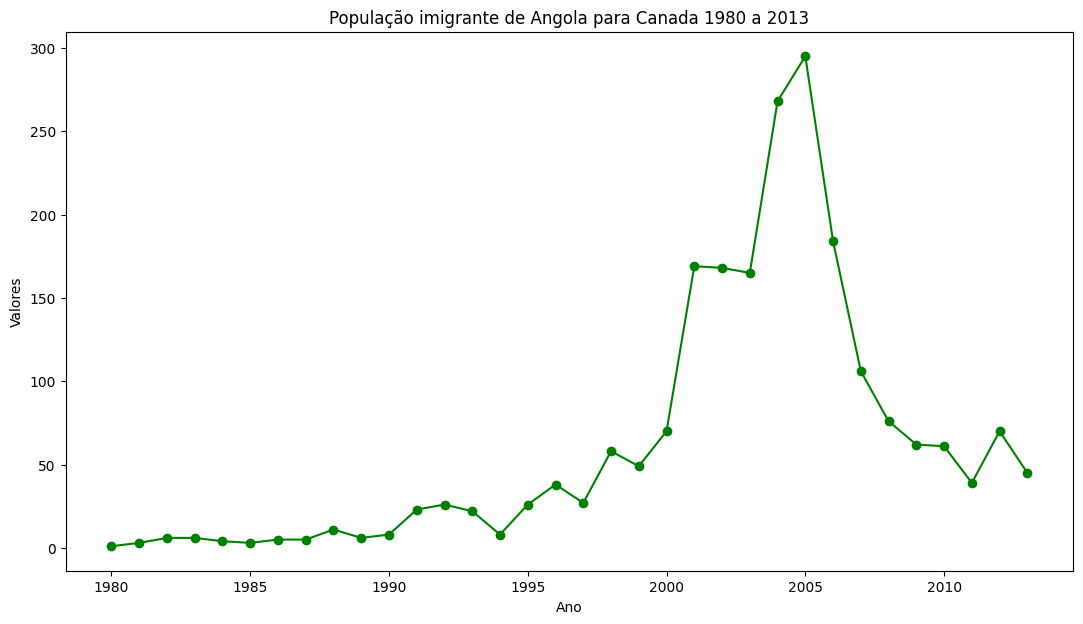

In [153]:
plt.figure(figsize=(13, 7))
plt.plot(data_final['Ano'], data_final['Angola'], marker='o', linestyle='-',color='green')
plt.title('População imigrante de Angola para Canada 1980 a 2013')
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.show()